In [51]:
import random
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [52]:
seed = 42
random.seed(seed)

### Functions Definitions

In [53]:
def my_show_df_shape(df):
    print("Number of examples/rows: {:,}".format(df.shape[0]))
    print("Number of features: {:,}".format(df.shape[1]))

In [54]:
def my_show_df_NaNs(df):
    nan_count = df.isna().sum()
    # nan_count = nan_count[nan_count > 0]
    nan_percentage = df.isna().mean() * 100
    # nan_percentage = nan_percentage[nan_percentage > 0]
    length = 0
    for i in nan_count.index: 
        if len(i) > length:
            length = len(i) 
    if nan_count.empty:
        print("No NaN values found in the dataset.")
    else:
        print("Number of examples/rows:", df.shape[0])
        print("Number of features:", df.shape[1])
        print("Features with NaNs:")
        for i in range(len(nan_count)):
            feature = nan_count.index[i]
            if nan_count[feature] > 0:
                print(f"{feature:<{length+5}} {nan_count[feature]:<10} {nan_percentage[feature]:<8.4f}%")
            else:
                print(f"{feature:<{length+10}} no NaNs")

In [55]:
def my_show_df(df):
    nan_count = df.isna().sum()
    # nan_count = nan_count[nan_count > 0]
    nan_percentage = df.isna().mean() * 100
    # nan_percentage = nan_percentage[nan_percentage > 0]
    length = 0
    for i in nan_count.index: 
        if len(i) > length:
            length = len(i) 
    if nan_count.empty:
        print("No NaN values found in the dataset.")
    else:
        print("Number of examples/rows:", df.shape[0])
        print("Number of features:", df.shape[1])
        print("Features with NaNs:")
        for i in range(len(nan_count)):
            feature = nan_count.index[i]
            if nan_count[feature] > 0:
                print(f"{feature:<{length+5}} {nan_count[feature]:<10} {nan_percentage[feature]:<8.4f}%")
            else:
                print(f"{feature:<{length+10}} no NaNs")

### Dataset Load

In [56]:
# Load the dataset

filename = '../dataset/lastovicka_2023_passiveOSRevisited.csv'
# p = 0.1  # 10% of the lines - Around 4M rows
# p = 0.0025  # 0,25% of the lines - Around 100k rows
df = pd.read_csv(
         filename,
         header=0,
         sep=';',
        #  skiprows=lambda i: i>0 and random.random() > p
)

In [57]:
df = df

### Initial Exploration

In [58]:
df

,flow_ID,UA OS family,UA OS major,UA OS minor,UA OS patch,UA OS patch minor,start,end,L3 PROTO,L4 PROTO,...,tcpOptionMaximumSegmentSizeforward,tcpOptionMaximumSegmentSizebackward,tcpOptionNoOperationforward,tcpOptionNoOperationbackward,packetTotalCountforward,packetTotalCountbackward,flowDirection,flowEndReason,synAckFlag,Unnamed: 111
0,4313,Other,NaN,NaN,NaN,NaN,2020-07-16 06:44:07.608708000,2020-07-16 06:44:07.838529000,4,6,...,1460.0,1460,1,1,6,4,1,1,1,NaN
1,14343,Other,NaN,NaN,NaN,NaN,2020-07-16 06:45:47.865065000,2020-07-16 06:45:47.913409000,4,6,...,1460.0,1460,1,1,4,3,0,1,1,NaN
2,18958,Other,NaN,NaN,NaN,NaN,2020-07-16 06:46:30.471169000,2020-07-16 06:46:30.782348000,4,6,...,1460.0,1460,1,1,5,4,1,1,1,NaN
3,21937,Windows,10,NaN,NaN,NaN,2020-07-16 06:47:41.565111000,2020-07-16 06:47:45.742005000,4,6,...,1420.0,1460,1,1,12,12,1,1,1,NaN
4,14120,Other,NaN,NaN,NaN,NaN,2020-07-16 06:49:37.426397000,2020-07-16 06:49:37.640743000,4,6,...,1460.0,1460,1,1,5,3,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109658,182498,Other,NaN,NaN,NaN,NaN,2020-07-16 14:41:02.354069000,2020-07-16 14:41:03.524971000,4,6,...,1460.0,1460,1,1,27,34,0,4,1,NaN
109659,188382,Other,NaN,NaN,NaN,NaN,2020-07-16 14:41:05.719276000,2020-07-16 14:41:07.243672000,4,6,...,1460.0,1460,1,1,79,82,1,4,1,NaN
109660,185688,Other,NaN,NaN,NaN,NaN,2020-07-16 14:41:06.297307000,2020-07-16 14:41:09.714209000,4,6,...,1460.0,1460,1,1,47,53,0,4,1,NaN
109661,177703,Other,NaN,NaN,NaN,NaN,2020-07-16 14:41:08.558144000,2020-07-16 14:41:11.136282000,4,6,...,1460.0,1460,1,1,40,49,0,4,1,NaN


In [59]:
my_show_df_shape(df)

Number of examples/rows: 109,663
Number of features: 112


In [60]:
print(df.info())  # Get information about the dataset (e.g., column names, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109663 entries, 0 to 109662
Columns: 112 entries, flow_ID to Unnamed: 111
dtypes: float64(28), int64(63), object(21)
memory usage: 93.7+ MB
None


In [61]:
print(df.head())  # Display the first few rows of the dataset

   flow_ID UA OS family UA OS major  UA OS minor  UA OS patch  \
0     4313        Other         NaN          NaN          NaN   
1    14343        Other         NaN          NaN          NaN   
2    18958        Other         NaN          NaN          NaN   
3    21937      Windows          10          NaN          NaN   
4    14120        Other         NaN          NaN          NaN   

   UA OS patch minor                          start  \
0                NaN  2020-07-16 06:44:07.608708000   
1                NaN  2020-07-16 06:45:47.865065000   
2                NaN  2020-07-16 06:46:30.471169000   
3                NaN  2020-07-16 06:47:41.565111000   
4                NaN  2020-07-16 06:49:37.426397000   

                             end  L3 PROTO  L4 PROTO  ...  \
0  2020-07-16 06:44:07.838529000         4         6  ...   
1  2020-07-16 06:45:47.913409000         4         6  ...   
2  2020-07-16 06:46:30.782348000         4         6  ...   
3  2020-07-16 06:47:45.742005000  

In [62]:
columns_list = df.columns.tolist()
print(columns_list)  # Get the list of columns in the dataset

['flow_ID', 'UA OS family', 'UA OS major', 'UA OS minor', 'UA OS patch', 'UA OS patch minor', 'start', 'end', 'L3 PROTO', 'L4 PROTO', 'BYTES A', 'PACKETS A', 'SRC IP', 'DST IP', 'TCP flags A', 'SRC port', 'DST port', 'ICMP TYPE', 'TCP SYN Size', 'TCP Win Size', 'TCP SYN TTL', 'IP ToS', 'HTTP Request Host', 'URL', 'NPM_CLIENT_NETWORK_TIME', 'NPM_SERVER_NETWORK_TIME', 'NPM_SERVER_RESPONSE_TIME', 'NPM_ROUND_TRIP_TIME', 'NPM_RESPONSE_TIMEOUTS_A', 'NPM_RESPONSE_TIMEOUTS_B', 'NPM_TCP_RETRANSMISSION_A', 'NPM_TCP_RETRANSMISSION_B', 'NPM_TCP_OUT_OF_ORDER_A', 'NPM_TCP_OUT_OF_ORDER_B', 'NPM_JITTER_DEV_A', 'NPM_JITTER_AVG_A', 'NPM_JITTER_MIN_A', 'NPM_JITTER_MAX_A', 'NPM_DELAY_DEV_A', 'NPM_DELAY_AVG_A', 'NPM_DELAY_MIN_A', 'NPM_DELAY_MAX_A', 'NPM_DELAY_HISTOGRAM_1_A', 'NPM_DELAY_HISTOGRAM_2_A', 'NPM_DELAY_HISTOGRAM_3_A', 'NPM_DELAY_HISTOGRAM_4_A', 'NPM_DELAY_HISTOGRAM_5_A', 'NPM_DELAY_HISTOGRAM_6_A', 'NPM_DELAY_HISTOGRAM_7_A', 'NPM_JITTER_DEV_B', 'NPM_JITTER_AVG_B', 'NPM_JITTER_MIN_B', 'NPM_JITTER_M

In [63]:
column_names_by_dtype = {str(dtype): columns.to_list() for dtype, columns in df.columns.groupby(df.dtypes).items()}
for dtype, columns in column_names_by_dtype.items():
    print(f"{dtype} ({len(columns)})")
    print(columns)
    print()

int64 (63)
['flow_ID', 'L3 PROTO', 'L4 PROTO', 'BYTES A', 'PACKETS A', 'SRC port', 'DST port', 'TCP SYN TTL', 'IP ToS', 'NPM_CLIENT_NETWORK_TIME', 'NPM_SERVER_NETWORK_TIME', 'NPM_SERVER_RESPONSE_TIME', 'NPM_ROUND_TRIP_TIME', 'NPM_RESPONSE_TIMEOUTS_A', 'NPM_RESPONSE_TIMEOUTS_B', 'NPM_TCP_RETRANSMISSION_A', 'NPM_TCP_RETRANSMISSION_B', 'NPM_TCP_OUT_OF_ORDER_A', 'NPM_TCP_OUT_OF_ORDER_B', 'NPM_JITTER_DEV_A', 'NPM_JITTER_AVG_A', 'NPM_JITTER_MIN_A', 'NPM_JITTER_MAX_A', 'NPM_DELAY_DEV_A', 'NPM_DELAY_AVG_A', 'NPM_DELAY_MIN_A', 'NPM_DELAY_MAX_A', 'NPM_DELAY_HISTOGRAM_1_A', 'NPM_DELAY_HISTOGRAM_2_A', 'NPM_DELAY_HISTOGRAM_3_A', 'NPM_DELAY_HISTOGRAM_4_A', 'NPM_DELAY_HISTOGRAM_5_A', 'NPM_DELAY_HISTOGRAM_6_A', 'NPM_DELAY_HISTOGRAM_7_A', 'NPM_JITTER_DEV_B', 'NPM_JITTER_AVG_B', 'NPM_JITTER_MIN_B', 'NPM_JITTER_MAX_B', 'NPM_DELAY_DEV_B', 'NPM_DELAY_AVG_B', 'NPM_DELAY_MIN_B', 'NPM_DELAY_MAX_B', 'NPM_DELAY_HISTOGRAM_1_B', 'NPM_DELAY_HISTOGRAM_2_B', 'NPM_DELAY_HISTOGRAM_3_B', 'NPM_DELAY_HISTOGRAM_4_B', 'NPM

In [64]:
# Count the number of NaN values in the dataframe
nan_count = df.isna().sum().sum()

# Count the number of duplicated values in the dataframe
duplicated_count = df.duplicated().sum()

# Print the results
print("Number of NaN values:", nan_count)
print("Number of duplicated values:", duplicated_count)

Number of NaN values: 1363244
Number of duplicated values: 0


In [65]:
my_show_df_NaNs(df)

Number of examples/rows: 109663
Number of features: 112
Features with NaNs:
flow_ID                                          no NaNs
UA OS family                                     no NaNs
UA OS major                                 45385      41.3859 %
UA OS minor                                 89293      81.4249 %
UA OS patch                                 93477      85.2402 %
UA OS patch minor                           109663     100.0000%
start                                            no NaNs
end                                              no NaNs
L3 PROTO                                         no NaNs
L4 PROTO                                         no NaNs
BYTES A                                          no NaNs
PACKETS A                                        no NaNs
SRC IP                                           no NaNs
DST IP                                           no NaNs
TCP flags A                                      no NaNs
SRC port                             

In [66]:
df.describe()

,flow_ID,UA OS minor,UA OS patch,UA OS patch minor,L3 PROTO,L4 PROTO,BYTES A,PACKETS A,SRC port,DST port,...,tcpOptionMaximumSegmentSizeforward,tcpOptionMaximumSegmentSizebackward,tcpOptionNoOperationforward,tcpOptionNoOperationbackward,packetTotalCountforward,packetTotalCountbackward,flowDirection,flowEndReason,synAckFlag,Unnamed: 111
count,109663.000000,20370.000000,16186.000000,0.0,109663.0,109663.0,1.096630e+05,109663.000000,109663.000000,109663.000000,...,109606.000000,109663.0,109663.000000,109663.000000,109663.000000,1.096630e+05,109663.000000,109663.000000,109663.0,0.0
mean,95991.844487,5.831861,2.202459,NaN,4.0,6.0,4.730954e+03,58.033685,41446.312065,408.945269,...,1463.160885,1460.0,0.997319,0.997319,57.887738,9.658285e+01,0.677393,1.026399,1.0,NaN
std,54832.207627,6.578816,1.987566,NaN,0.0,0.0,1.411542e+05,2813.989105,18167.714769,105.840658,...,394.944312,0.0,0.051709,0.051709,2813.980090,6.392697e+03,0.467476,0.280180,0.0,NaN
min,452.000000,0.000000,0.000000,NaN,4.0,6.0,2.300000e+02,3.000000,1024.000000,80.000000,...,960.000000,1460.0,0.000000,0.000000,3.000000,2.000000e+00,0.000000,1.000000,1.0,NaN
25%,48614.500000,1.000000,1.000000,NaN,4.0,6.0,1.312000e+03,9.000000,28966.500000,443.000000,...,1430.000000,1460.0,1.000000,1.000000,9.000000,8.000000e+00,0.000000,1.000000,1.0,NaN
50%,95834.000000,5.000000,1.000000,NaN,4.0,6.0,1.948000e+03,16.000000,48460.000000,443.000000,...,1460.000000,1460.0,1.000000,1.000000,16.000000,1.900000e+01,1.000000,1.000000,1.0,NaN
75%,143315.000000,10.000000,4.000000,NaN,4.0,6.0,3.437000e+03,32.000000,55436.000000,443.000000,...,1460.000000,1460.0,1.000000,1.000000,32.000000,4.800000e+01,1.000000,1.000000,1.0,NaN
max,192498.000000,92.000000,8.000000,NaN,4.0,6.0,3.702518e+07,683642.000000,65534.000000,443.000000,...,15284.000000,1460.0,1.000000,1.000000,683642.000000,1.659377e+06,1.000000,4.000000,1.0,NaN


In [67]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109663 entries, 0 to 109662
Columns: 112 entries, flow_ID to Unnamed: 111
dtypes: float64(28), int64(63), object(21)
memory usage: 252.8 MB


#### Target Classes

In [68]:
target = 'UA OS family'
# target = 'HTTP_Host_OS_Major_Version'
# target = 'HTTP_Host_OS_Minor_Version'
# target = 'HTTP_hostname'
targets = ['UA OS family', 'UA OS major', 'UA OS minor']

In [69]:
df[target].value_counts()

UA OS family
Other         42474
Windows       40349
Android       10290
iOS            8840
Mac OS X       5324
Linux          1589
Ubuntu          653
Fedora           88
Chrome OS        53
Symbian OS        1
Slackware         1
Linux Mint        1
Name: count, dtype: int64

#### Histogram

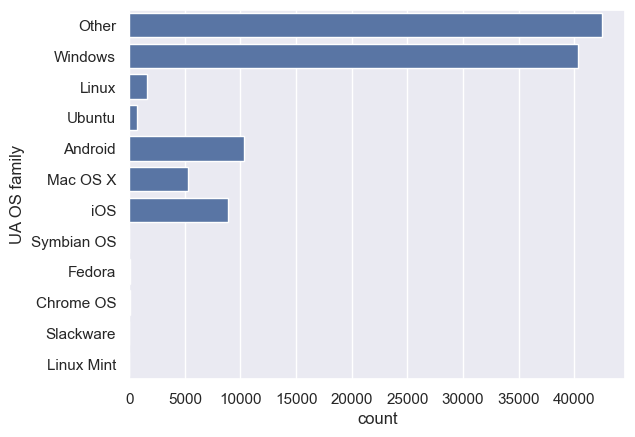

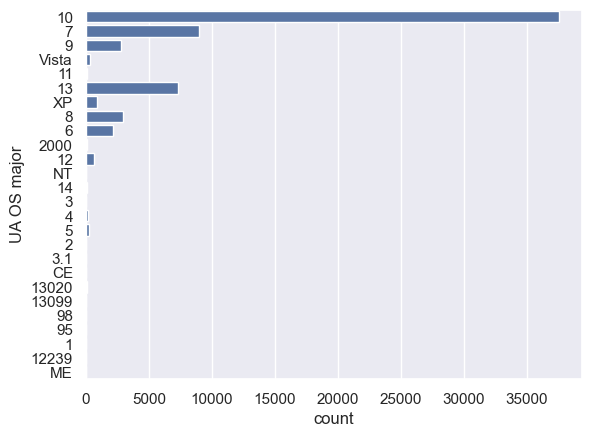

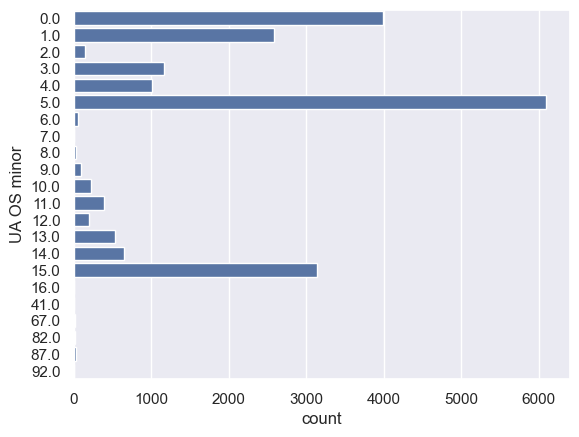

In [70]:
for column in targets:
    plt.xticks(rotation=0)
    sns.countplot(y=column, data=df)
    plt.show()

<Axes: xlabel='count'>

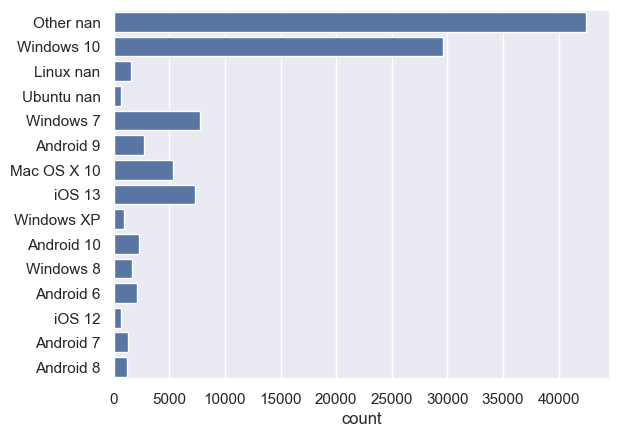

In [71]:
df_hist = df[targets[0]] + " " + df[targets[1]].astype(str)
top_10_values = df_hist.value_counts().head(15)
df_hist = df_hist[df_hist.isin(top_10_values.index)]
sns.countplot(data=df_hist)

In [72]:
df_hist.value_counts()

Other nan      42474
Windows 10     29557
Windows 7       7726
iOS 13          7320
Mac OS X 10     5281
Android 9       2737
Android 10      2257
Android 6       2122
Windows 8       1673
Linux nan       1584
Android 7       1271
Android 8       1217
Windows XP       893
iOS 12           659
Ubuntu nan       650
Name: count, dtype: int64

<Axes: xlabel='count'>

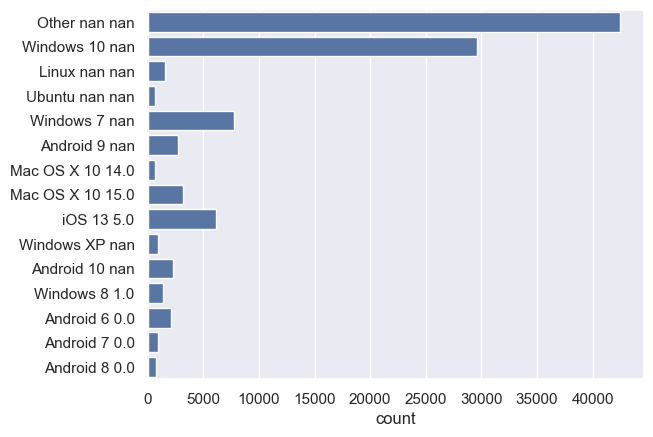

In [73]:
df_hist = df[targets[0]] + " " + df[targets[1]].astype(str) + " " + df[targets[2]].astype(str)
top_10_values = df_hist.value_counts().head(15)
df_hist = df_hist[df_hist.isin(top_10_values.index)]
sns.countplot(data=df_hist)

In [74]:
df_hist.value_counts()

Other nan nan       42474
Windows 10 nan      29557
Windows 7 nan        7726
iOS 13 5.0           6094
Mac OS X 10 15.0     3137
Android 9 nan        2737
Android 10 nan       2257
Android 6 0.0        2122
Linux nan nan        1584
Windows 8 1.0        1372
Android 7 0.0         913
Windows XP nan        893
Android 8 0.0         761
Ubuntu nan nan        650
Mac OS X 10 14.0      649
Name: count, dtype: int64

In [76]:
df_family = df[targets[0]]
df_major = df[targets[0]] + " " + df[targets[1]].astype(str)
df_minor = df[targets[0]] + " " + df[targets[1]].astype(str) + " " + df[targets[2]].astype(str)

In [77]:
df_family.nunique(), df_major.nunique(), df_minor.nunique()

(12, 50, 88)

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Other'

<Figure size 1000x800 with 0 Axes>

### Preprocessing

In [25]:
my_show_df_shape(df)

Number of examples/rows: 109,663
Number of features: 112


In [26]:
df.dropna(subset=target, inplace=True)

In [27]:
my_show_df_shape(df)

Number of examples/rows: 109,663
Number of features: 112


In [28]:
df['OS target'] = df[targets[0]] + " " + df[targets[1]].astype(str)
df.drop(targets, axis=1, inplace=True)
target = 'OS target'

In [29]:
my_show_df_shape(df)

Number of examples/rows: 109,663
Number of features: 110


In [30]:
drop_columns = [
    "flow_ID",
    "UA OS patch",
    "UA OS patch minor",
    "ICMP TYPE",
    "TLS_ALPN",
    "TLS_ISSUER_CN",
    "TLS_SUBJECT_CN",
    "TLS_SUBJECT_ON",
    "Unnamed: 111"
]

df.drop(columns=drop_columns, inplace=True)

In [31]:
my_show_df_shape(df)

Number of examples/rows: 109,663
Number of features: 101


In [32]:
drop_nans_rows = [
    "TCP SYN Size",
    "TCP Win Size"
]

df.dropna(subset=drop_nans_rows, 
          inplace=True)

In [33]:
my_show_df_shape(df)

Number of examples/rows: 109,661
Number of features: 101


In [34]:
my_show_df_NaNs(df)

Number of examples/rows: 109661
Number of features: 101
Features with NaNs:
start                                            no NaNs
end                                              no NaNs
L3 PROTO                                         no NaNs
L4 PROTO                                         no NaNs
BYTES A                                          no NaNs
PACKETS A                                        no NaNs
SRC IP                                           no NaNs
DST IP                                           no NaNs
TCP flags A                                      no NaNs
SRC port                                         no NaNs
DST port                                         no NaNs
TCP SYN Size                                     no NaNs
TCP Win Size                                     no NaNs
TCP SYN TTL                                      no NaNs
IP ToS                                           no NaNs
HTTP Request Host                                no NaNs
URL         

In [35]:
df.loc[df[target].str.contains('Other', na=False), target] = 'Other'

In [36]:
df.loc[df[target].str.contains('iOS', na=False), target] = 'iOS'

In [37]:
df.loc[df[target].str.contains('Android', na=False), target] = 'Android'

In [38]:
df.loc[df[target].str.contains('Mac OS X', na=False), target] = 'Mac OS X'

In [39]:
# df.loc[df[target].str.contains('Chrome OS', na=False), target] = 'Chrome OS'

In [40]:
df.loc[df[target].str.contains('Windows (?!10|7)', regex=True, na=False), target] = 'Windows O'

In [41]:
df.loc[~df[target].str.contains('(Windows|Android|iOS|Mac|Other)', regex=True, na=False), target] = 'Linux'

C:\Users\ruben\AppData\Local\Temp\ipykernel_24024\2102560513.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[~df[target].str.contains('(Windows|Android|iOS|Mac|Other)', regex=True, na=False), target] = 'Linux'


In [42]:
df[target].value_counts()

OS target
Other         42474
Windows 10    29557
Android       10289
iOS            8840
Windows 7      7725
Mac OS X       5324
Windows O      3066
Linux          2386
Name: count, dtype: int64

In [43]:
df.drop_duplicates(inplace=True)

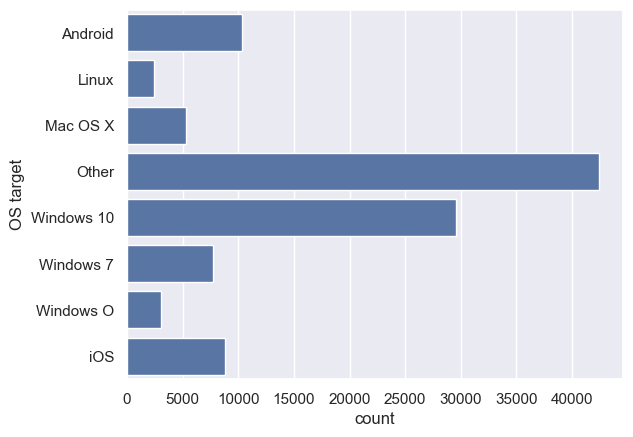

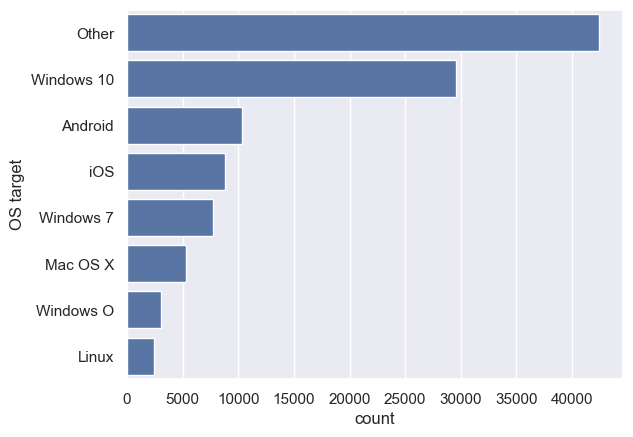

In [44]:
top = 30

top_values = df[target].value_counts().head(top)

plt.xticks(rotation=0)
sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index.sort_values())
plt.show()

plt.xticks(rotation=0)
sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index)
plt.show()

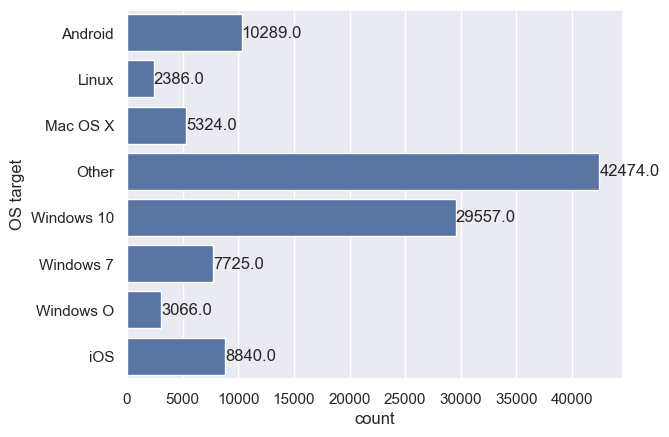

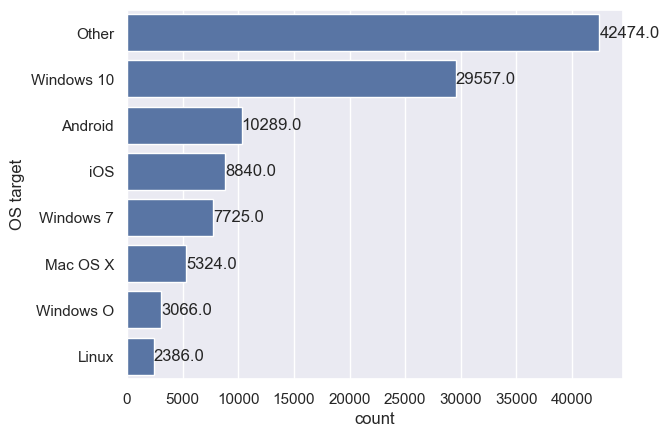

In [45]:
plt.xticks(rotation=0)
ax = sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index.sort_values())
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

plt.xticks(rotation=0)
ax = sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

In [46]:
numeric_columns = df.select_dtypes(include=['float', 'int'])
low_variance_columns = numeric_columns.columns[numeric_columns.var() <= 0]
print(low_variance_columns)
df.drop(columns=low_variance_columns, inplace=True)

Index(['L3 PROTO', 'L4 PROTO', 'NPM_DELAY_HISTOGRAM_2_A',
       'NPM_DELAY_HISTOGRAM_3_A', 'NPM_DELAY_HISTOGRAM_4_A',
       'NPM_DELAY_HISTOGRAM_5_A', 'NPM_DELAY_HISTOGRAM_6_A',
       'NPM_DELAY_HISTOGRAM_7_A', 'NPM_DELAY_HISTOGRAM_2_B',
       'NPM_DELAY_HISTOGRAM_3_B', 'NPM_DELAY_HISTOGRAM_4_B',
       'NPM_DELAY_HISTOGRAM_5_B', 'NPM_DELAY_HISTOGRAM_6_B',
       'NPM_DELAY_HISTOGRAM_7_B', 'TLS_VALIDITY_NOT_BEFORE',
       'TLS_VALIDITY_NOT_AFTER', 'TLS_SIGNATURE_ALG', 'TLS_PUBLIC_KEY_ALG',
       'TLS_PUBLIC_KEY_LENGTH', 'maximumTTLbackward',
       'IPv4DontFragmentbackward', 'tcpOptionWindowScalebackward',
       'tcpOptionMaximumSegmentSizebackward', 'synAckFlag'],
      dtype='object')


In [47]:
import openpyxl

description = df.describe()
description.to_excel('description.xlsx', index=True)

In [48]:
my_show_df_NaNs(df)

Number of examples/rows: 109661
Number of features: 77
Features with NaNs:
start                                            no NaNs
end                                              no NaNs
BYTES A                                          no NaNs
PACKETS A                                        no NaNs
SRC IP                                           no NaNs
DST IP                                           no NaNs
TCP flags A                                      no NaNs
SRC port                                         no NaNs
DST port                                         no NaNs
TCP SYN Size                                     no NaNs
TCP Win Size                                     no NaNs
TCP SYN TTL                                      no NaNs
IP ToS                                           no NaNs
HTTP Request Host                                no NaNs
URL                                              no NaNs
NPM_CLIENT_NETWORK_TIME                          no NaNs
NPM_SERVER_NE

In [49]:
df["NPM_CLIENT_NETWORK_TIME"].value_counts()

NPM_CLIENT_NETWORK_TIME
99053     24
99030     24
103174    23
106298    22
108640    22
          ..
150540     1
62155      1
13472      1
140082     1
196926     1
Name: count, Length: 58920, dtype: int64

### Split